In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path
import pickle
from src.data_analysis.data_analyzer import DataAnalyzer
from src.evaluation.evaluation_metric_ged import GraphEditDistanceMetric
import pandas as pd

/NFSHOME/mprado/miniconda3/envs/XAI39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
output_folder = module_path + '/vis/output/'
stats_folder = module_path + '/vis/stats/'

In [2]:
from src.evaluation.evaluator_manager import EvaluatorManager

2023-08-16 08:46:34.632154: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-16 08:46:34.678744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-16 08:46:34.680273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 08:47:07.614923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## CLEAR

In [41]:
# clear_config_file_path = module_path + '/vis/config/asd_custom-oracle_clear_fold-0.json'
# clear_output_file_path = module_path + '/vis/output/asd_custom_oracle/clear_fit_on_autism_dataset_fold_id=0_batch_size_ratio=0.15_alpha=0.4_lr=0.01_weight_decay=5e-05_epochs=600_dropout=0.1/results_run-0.json'
clear_config_file_path = module_path + '/vis/config/tc28_clear_fold-0.json'
clear_output_file_path = module_path + '/vis/output/tree_cycles_custom_oracle/clear_fit_on_tree-cycles_instances-500_nodes_per_inst-28_nodes_in_cycles-7_fold_id=0_batch_size_ratio=0.15_alpha=0.4_lr=0.01_weight_decay=5e-05_epochs=600_dropout=0.1/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(clear_config_file_path), os.path.isfile(clear_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

#### Executing the pipeline

In [39]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(clear_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

2023-08-16 02:11:39,-72414948 | INFO | 180280 - Created <class 'src.explainer.explainer_clear.CLEARExplainer'>
2023-08-16 02:11:39,-72414944 | INFO | 180280 - Created <class 'src.oracle.oracle_tree_cycles_custom.TreeCyclesCustomOracle'>
Finished evaluating for instance 10
2023-08-16 02:11:39,-72414687 | INFO | 180280 - evaluated instance with id 10
Finished evaluating for instance 23
2023-08-16 02:11:40,-72414376 | INFO | 180280 - evaluated instance with id 23
Finished evaluating for instance 37
2023-08-16 02:11:40,-72413987 | INFO | 180280 - evaluated instance with id 37
Finished evaluating for instance 49
2023-08-16 02:11:41,-72413509 | INFO | 180280 - evaluated instance with id 49
Finished evaluating for instance 53
2023-08-16 02:11:41,-72412965 | INFO | 180280 - evaluated instance with id 53
Finished evaluating for instance 65
2023-08-16 02:11:42,-72412352 | INFO | 180280 - evaluated instance with id 65
Finished evaluating for instance 74
2023-08-16 02:11:42,-72411663 | INFO | 1802

#### Reading the json with the results

In [42]:
with open(clear_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "clear", "parameters": {"n_nodes": 28, "n_labels": 2, "fold_id": 0, "alpha": 0.4, "batch_size_ratio": 0.15, "dropout": 0.1, "epochs": 600, "lambda_cfe": 0.1, "lambda_kl": 1.0, "lambda_sim": 1.0, "lr": 0.01, "weight_decay": 5e-05}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.2517874240875244, 0.3082737922668457, 0.3861253261566162, 0.4746260643005371, 0.5371344089508057, 0.61043381690979, 0.684248685836792, 0.753516674041748, 0.8294346332550049, 1.4007470607757568, 0.9762849807739258, 1.051018476486206, 1.1199190616607666, 1.193701028823852

#### Creating the DataAnalyzer

In [17]:
dtan = DataAnalyzer(output_folder, stats_folder)

#### Saving the results into a pickle

In [43]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [44]:
og_instances = ev.dataset.instances
og_url = module_path + '/vis/pickles/og_instances.pickle'
with open(og_url, 'wb') as file:
    pickle.dump(og_instances, file)

In [45]:
clear_cf_list = ev.explanations
clear_cf_url = module_path + '/vis/pickles/clear_cf_instances.pickle'
with open(clear_cf_url, 'wb') as file:
    pickle.dump(clear_cf_list, file)

# CF2

In [5]:
# cf2_config_file_path = module_path + '/vis/config/asd_custom-oracle_cf2_fold-0.json'
# cf2_output_file_path = module_path + '/vis/output/asd_custom_oracle/cf2_fit_on_autism_dataset_fold_id=0_alpha=0.7_lam=5_epochs=500_lr=0.01_batch_size=0.1_gamma=0.9_weight_decay=1e-05/results_run-0.json'

cf2_config_file_path = module_path + '/vis/config/tc28_cf2_fold-0.json'
cf2_output_file_path = module_path + '/vis/output/tree_cycles_custom_oracle/cf2_fit_on_tree-cycles_instances-500_nodes_per_inst-28_nodes_in_cycles-7_fold_id=0_alpha=0.7_lam=5_epochs=500_lr=0.01_batch_size=0.1_gamma=0.9_weight_decay=1e-05/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(cf2_config_file_path), os.path.isfile(cf2_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

In [4]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(cf2_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

2023-08-16 02:23:42,-71691818 | INFO | 181619 - Created <class 'src.explainer.explainer_cf2.CF2Explainer'>
2023-08-16 02:23:42,-71691814 | INFO | 181619 - Created <class 'src.oracle.oracle_tree_cycles_custom.TreeCyclesCustomOracle'>
Finished evaluating for instance 10
2023-08-16 02:23:47,-71687440 | INFO | 181619 - evaluated instance with id 10


/NFSHOME/mprado/miniconda3/envs/XAI39/lib/python3.9/site-packages/networkx/algorithms/centrality/second_order.py:117: RuntimeWarning: invalid value encountered in true_divide
  P /= P.sum(axis=1)[:, np.newaxis]  # to transition probability matrix


Finished evaluating for instance 23
2023-08-16 02:23:51,-71682758 | INFO | 181619 - evaluated instance with id 23
Finished evaluating for instance 37
2023-08-16 02:23:56,-71678580 | INFO | 181619 - evaluated instance with id 37
Finished evaluating for instance 49
2023-08-16 02:24:00,-71674363 | INFO | 181619 - evaluated instance with id 49
Finished evaluating for instance 53
2023-08-16 02:24:04,-71670126 | INFO | 181619 - evaluated instance with id 53
Finished evaluating for instance 65
2023-08-16 02:24:09,-71665354 | INFO | 181619 - evaluated instance with id 65
Finished evaluating for instance 74
2023-08-16 02:24:13,-71661076 | INFO | 181619 - evaluated instance with id 74
Finished evaluating for instance 96
2023-08-16 02:24:17,-71656865 | INFO | 181619 - evaluated instance with id 96
Finished evaluating for instance 114
2023-08-16 02:24:21,-71652694 | INFO | 181619 - evaluated instance with id 114
Finished evaluating for instance 115
2023-08-16 02:24:26,-71648159 | INFO | 181619 - e

In [6]:
with open(cf2_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "cf2", "parameters": {"n_nodes": 28, "fold_id": 0, "alpha": 0.7, "lam": 20, "epochs": 500, "lr": 0.01, "batch_size": 0.2, "gamma": 0.9, "feature_dim": 8, "converter": "tree_cycles"}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [4.368607759475708, 4.67829966545105, 4.156433582305908, 4.213104248046875, 4.233537435531616, 4.725193977355957, 4.259904861450195, 4.2087931632995605, 4.1677961349487305, 4.530715227127075, 4.342433929443359, 4.244302034378052, 4.197052478790283, 4.254702091217041, 4.526020526885986, 4.151322364807129, 4.1898479461669

In [7]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [8]:
cf2_cf_list = ev.explanations
cf2_cf_url = module_path + '/vis/pickles/cf2_cf_instances.pickle'
with open(cf2_cf_url, 'wb') as file:
    pickle.dump(cf2_cf_list, file)

## CounteRGAN

In [16]:
# cg_config_file_path = module_path + '/vis/config/asd_custom-oracle_countergan_fold-0.json'
# cg_output_file_path = module_path + '/vis/output/asd_custom_oracle/countergan_fit_on_autism_dataset_fold_id_0_batch_ratio_0.1_training_iter_250gen_steps_2_disc_steps_3bin_threshold_0.5/results_run-0.json'

cg_config_file_path = module_path + '/vis/config/tc28_countergan_fold-0.json'
cg_output_file_path = module_path + '/vis/output/tree_cycles_custom_oracle/countergan_fit_on_tree-cycles_instances-500_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0_batch_ratio_0.1_training_iter_250gen_steps_2_disc_steps_3bin_threshold_0.5/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(cg_config_file_path), os.path.isfile(cg_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

#### Executing the pipeline

In [15]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(cg_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

2023-08-16 02:36:04,-70949919 | INFO | 181619 - Created <class 'src.explainer.explainer_countergan.CounteRGANExplainer'>
2023-08-16 02:36:04,-70949754 | INFO | 181619 - Created <class 'src.oracle.oracle_tree_cycles_custom.TreeCyclesCustomOracle'>
2023-08-16 02:36:04,-70949670 | INFO | 181619 - evaluated instance with id 10
2023-08-16 02:36:04,-70949651 | INFO | 181619 - evaluated instance with id 23
2023-08-16 02:36:04,-70949634 | INFO | 181619 - evaluated instance with id 37
2023-08-16 02:36:05,-70949615 | INFO | 181619 - evaluated instance with id 49
2023-08-16 02:36:05,-70949600 | INFO | 181619 - evaluated instance with id 53
2023-08-16 02:36:05,-70949585 | INFO | 181619 - evaluated instance with id 65
2023-08-16 02:36:05,-70949570 | INFO | 181619 - evaluated instance with id 74
2023-08-16 02:36:05,-70949554 | INFO | 181619 - evaluated instance with id 96
2023-08-16 02:36:05,-70949538 | INFO | 181619 - evaluated instance with id 114
2023-08-16 02:36:05,-70949522 | INFO | 181619 - ev

#### Reading the json with the results

In [17]:
with open(cg_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "countergan", "parameters": {"fold_id": 0, "n_nodes": 28, "batch_size_ratio": 0.1, "device": "cpu", "training_iterations": 250, "n_discriminator_steps": 3, "n_generator_steps": 2, "n_labels": 2, "ce_binarization_threshold": 0.5}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.0729837417602539, 0.008663177490234375, 0.007591962814331055, 0.00789785385131836, 0.00746917724609375, 0.006795644760131836, 0.007208585739135742, 0.006865501403808594, 0.00797271728515625, 0.0077724456787109375, 0.007699489593505859, 0.0068361759185791016, 0.0070562362

#### Saving the results into a pickle

In [18]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [19]:
countergan_cf_list = ev.explanations
countergan_cf_url = module_path + '/vis/pickles/countergan_cf_instances.pickle'
with open(countergan_cf_url, 'wb') as file:
    pickle.dump(countergan_cf_list, file)

# RSGG

In [22]:
# rsgg_config_file_path = module_path + '/vis/config/asd_custom-oracle_rsgg_fold-0.json'
# rsgg_output_file_path = module_path + '/vis/output/asd_custom_oracle/graph_countergan_fit_on_autism_dataset_fold_id_0_lr_gen_0.001_lr_discr_0.001_epochs_500_sampl_iters_500/results_run-0.json'

rsgg_config_file_path = module_path + '/vis/config/tc28_rsgg_fold_0.json'
rsgg_output_file_path = module_path + '/vis/output/tree_cycles_custom_oracle/graph_countergan_fit_on_tree-cycles_instances-500_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0_lr_gen_0.001_lr_discr_0.001_epochs_500_sampl_iters_500/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(rsgg_config_file_path), os.path.isfile(rsgg_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

In [21]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(rsgg_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

2023-08-16 02:38:38,-70796246 | INFO | 181619 - Created <class 'src.explainer.explainer_rsgg_ce.GraphCounteRGANExplainer'>
2023-08-16 02:38:38,-70796241 | INFO | 181619 - Created <class 'src.oracle.oracle_tree_cycles_custom.TreeCyclesCustomOracle'>
2023-08-16 02:38:38,-70796187 | INFO | 181619 - evaluated instance with id 10
2023-08-16 02:38:38,-70796161 | INFO | 181619 - evaluated instance with id 23
2023-08-16 02:38:39,-70795536 | INFO | 181619 - evaluated instance with id 37
2023-08-16 02:38:39,-70795506 | INFO | 181619 - evaluated instance with id 49
2023-08-16 02:38:39,-70795464 | INFO | 181619 - evaluated instance with id 53
2023-08-16 02:38:39,-70795433 | INFO | 181619 - evaluated instance with id 65
2023-08-16 02:38:39,-70795414 | INFO | 181619 - evaluated instance with id 74
2023-08-16 02:38:39,-70795395 | INFO | 181619 - evaluated instance with id 96
2023-08-16 02:38:39,-70795379 | INFO | 181619 - evaluated instance with id 114
2023-08-16 02:38:39,-70795362 | INFO | 181619 - 

In [23]:
with open(rsgg_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "graph_countergan", "parameters": {"fold_id": 0, "n_nodes": 28, "device": "cpu", "converter": "tree_cycles", "n_labels": 2, "training_iterations": 500, "sampling_iterations": 500, "feature_dim": 8, "lr_generator": 0.001, "lr_discriminator": 0.001}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.04855799674987793, 0.022626876831054688, 0.6227669715881348, 0.02726149559020996, 0.038521528244018555, 0.014597415924072266, 0.016550064086914062, 0.01620936393737793, 0.012834310531616211, 0.013842582702636719, 0.01574540138244629, 0.0203464031219482

In [24]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [25]:
rsgg_cf_list = ev.explanations
rsgg_cf_url = module_path + '/vis/pickles/rsgg_cf_instances.pickle'
with open(rsgg_cf_url, 'wb') as file:
    pickle.dump(rsgg_cf_list, file)

## iRand

In [11]:
irand_config_file_path = module_path + '/examples/config/config_tc_custom-oracle_i-rand_server.json'
irand_output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/i_rand/results_run-0.json'

# Verifying that the paths are valid
(os.path.isfile(irand_config_file_path), os.path.isfile(irand_output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

(True, True, True, True)

#### Executing the pipeline

In [12]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(irand_config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

evaluated instance with id  0
evaluated instance with id  1
evaluated instance with id  2
evaluated instance with id  3
evaluated instance with id  4
evaluated instance with id  5
evaluated instance with id  6
evaluated instance with id  7
evaluated instance with id  8
evaluated instance with id  9
evaluated instance with id  10
evaluated instance with id  11
evaluated instance with id  12
evaluated instance with id  13
evaluated instance with id  14
evaluated instance with id  15
evaluated instance with id  16
evaluated instance with id  17
evaluated instance with id  18
evaluated instance with id  19
evaluated instance with id  20
evaluated instance with id  21
evaluated instance with id  22
evaluated instance with id  23
evaluated instance with id  24
evaluated instance with id  25
evaluated instance with id  26
evaluated instance with id  27
evaluated instance with id  28
evaluated instance with id  29
evaluated instance with id  30
evaluated instance with id  31
evaluated instance

#### Reading the json with the results

In [13]:
with open(irand_output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 500, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "i-rand", "parameters": {"fold_id": -1, "perturbation_percentage": 0.15, "tries": 10}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [0.007051944732666016, 0.006173133850097656, 0.01599407196044922, 0.5305838584899902, 0.5431849956512451, 0.005676746368408203, 0.005662202835083008, 0.005850315093994141, 0.006291627883911133, 0.0063173770904541016, 0.5344052314758301, 0.0058977603912353516, 0.005667924880981445, 0.541191577911377, 0.00586700439453125, 0.005717039108276367, 0.005758047103881836, 0.005573749542236328, 0.00597071647644043, 0.005840

#### Saving the results into a pickle file

In [14]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]

In [15]:
irand_cf_list = ev.explanations
irand_cf_url = module_path + '/examples/pickles/i-rand_cf_instances.pickle'
with open(irand_cf_url, 'wb') as file:
    pickle.dump(irand_cf_list, file)

## Visualizing the results

In [4]:
og_file_path = module_path + '/vis/pickles/og_instances.pickle'
cg_file_path = module_path + '/vis/pickles/countergan_cf_instances.pickle'
clear_file_path = module_path + '/vis/pickles/clear_cf_instances.pickle'
cf2_file_path = module_path + '/vis/pickles/cf2_cf_instances.pickle'
rsgg_file_path = module_path + '/vis/pickles/rsgg_cf_instances.pickle'


og_instances = []
with open(og_file_path, 'rb') as file:
    og_instances = pickle.load(file)
    print(len(og_instances))

cg_instances = []
with open(cg_file_path, 'rb') as file:
    cg_instances = pickle.load(file)
    print(len(cg_instances))

clear_instances = []
with open(clear_file_path, 'rb') as file:
    clear_instances = pickle.load(file)
    print(len(clear_instances))

cf2_instances = []
with open(cf2_file_path, 'rb') as file:
    cf2_instances = pickle.load(file)
    print(len(cf2_instances))

rsgg_instances = []
with open(rsgg_file_path, 'rb') as file:
    rsgg_instances = pickle.load(file)
    print(len(rsgg_instances))


500
50
50
50
50


In [5]:
def find_instance(inst_list, id):
    for i in range(0, len(inst_list)):
        if inst_list[i].id == id:
            return inst_list[i]
        
    return None

ged = GraphEditDistanceMetric()

In [6]:
ged = GraphEditDistanceMetric()

In [11]:
cf_pos_class1 = 40
rsgg_cf_class1 = rsgg_instances[cf_pos_class1]
clear_cf_class1 = clear_instances[cf_pos_class1]
cf2_cf_class1 = cf2_instances[cf_pos_class1]
countergan_cf_class1 = cg_instances[cf_pos_class1]
og_inst_class1 = find_instance(og_instances, rsgg_cf_class1.id)

og_inst_class1.graph_label

1

In [12]:
ged.evaluate(og_inst_class1, rsgg_cf_class1, None)

8.0

In [8]:
cf_pos_class0 = 1
rsgg_cf_class0 = rsgg_instances[cf_pos_class0]
clear_cf_class0 = clear_instances[cf_pos_class0]
cf2_cf_class0 = cf2_instances[cf_pos_class0]
countergan_cf_class0 = cg_instances[cf_pos_class0]
og_inst_class0 = find_instance(og_instances, rsgg_cf_class0.id)

og_inst_class0.graph_label

0

In [10]:
ged.evaluate(og_inst_class0, rsgg_cf_class0, None)

15.0

#### Creating the DataAnalyzer

In [12]:
dtan = DataAnalyzer(output_folder, stats_folder)

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

#### Class 0

In [24]:
layout = nx.spring_layout
pos_class_0_og = layout(og_inst_class0.graph)

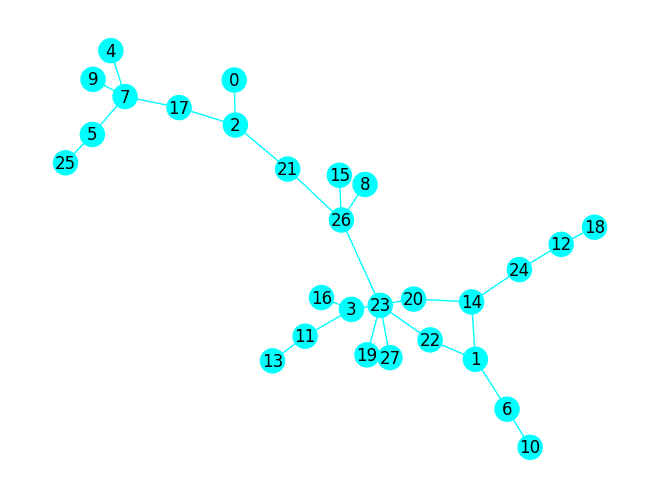

In [25]:
# Save the figure as an SVG file
output_path = module_path + '/vis/img/og_class0.svg'
dtan.draw_graph_custom_position(og_inst_class0, pos_class_0_og, img_store_address=output_path)

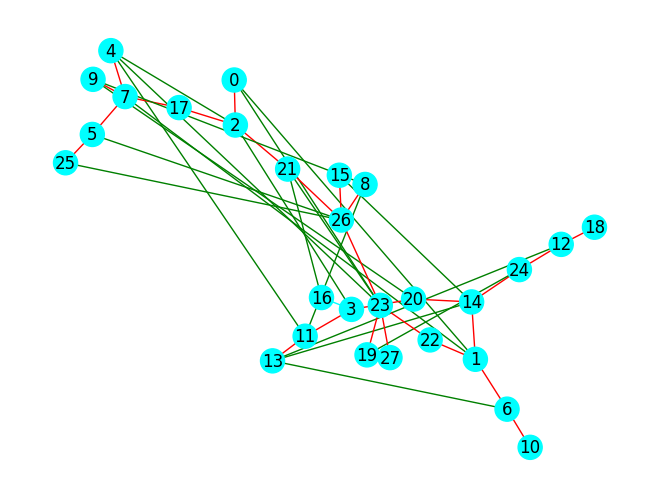

In [26]:
output_path = module_path + '/vis/img/rsgg_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class0, rsgg_cf_class0, position=pos_class_0_og, img_store_address=output_path)

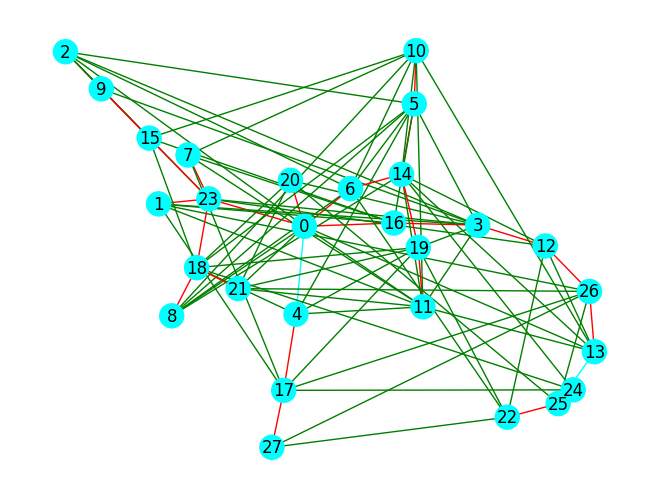

In [40]:
output_path = module_path + '/vis/img/clear_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class0, clear_cf_class0, position=pos_class_0_og, img_store_address=output_path)

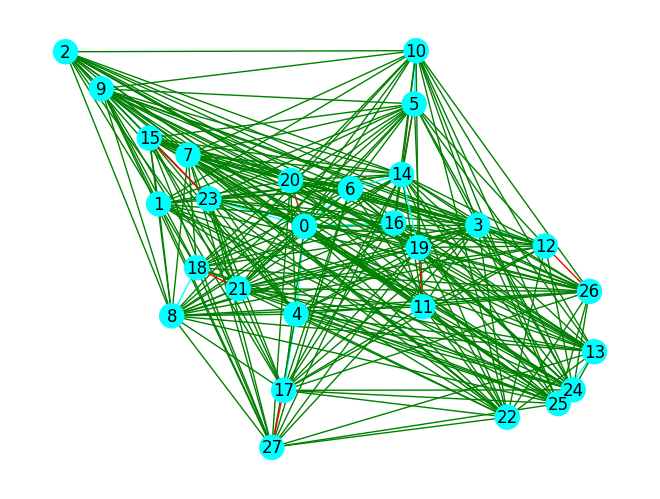

In [41]:
output_path = module_path + '/vis/img/countergan_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class0, countergan_cf_class0, position=pos_class_0_og, img_store_address=output_path)

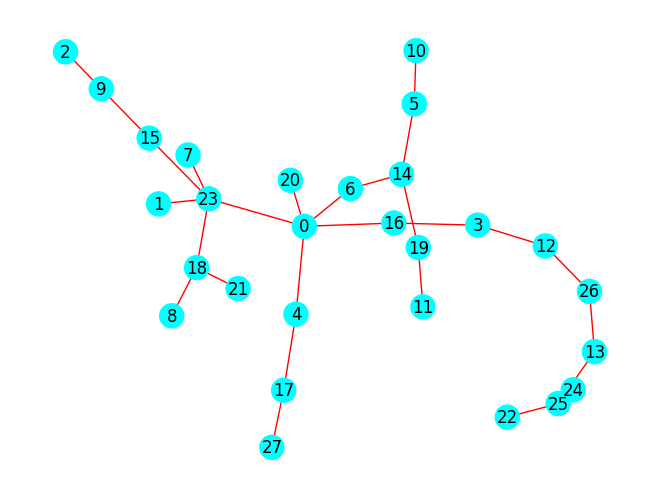

In [42]:
output_path = module_path + '/vis/img/cf2_class0.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class0, cf2_cf_class0, position=pos_class_0_og, img_store_address=output_path)

#### Class 1

In [45]:
pos_class_1_og = layout(og_inst_class1.graph)

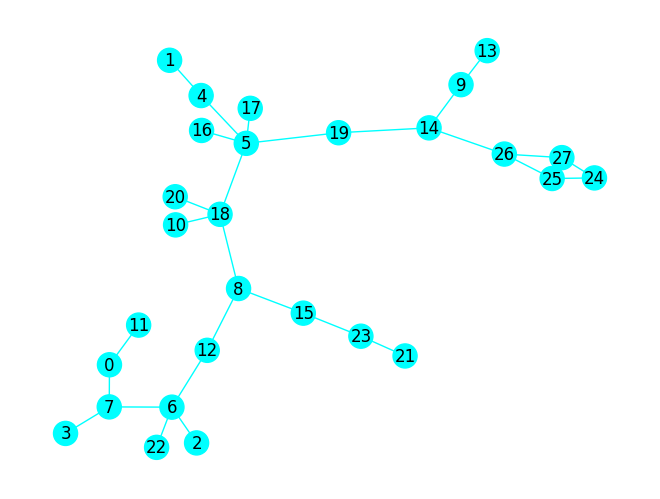

In [46]:
output_path = module_path + '/vis/img/og_class1.svg'
dtan.draw_graph_custom_position(og_inst_class1, pos_class_1_og, img_store_address=output_path)

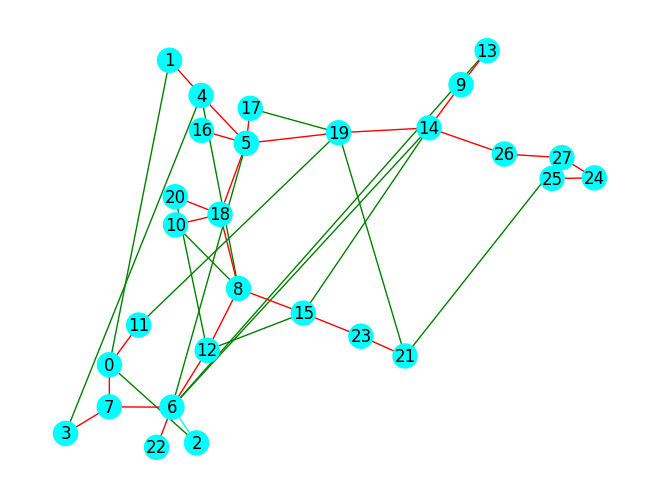

In [47]:
output_path = module_path + '/vis/img/rsgg_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class1, rsgg_cf_class1, position=pos_class_1_og, img_store_address=output_path)

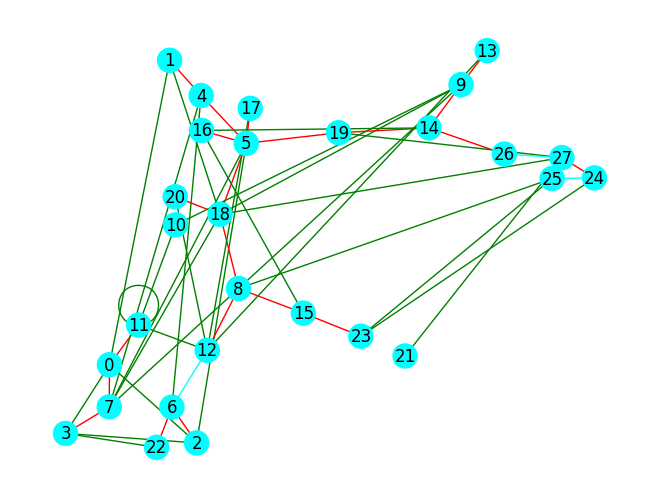

In [48]:
output_path = module_path + '/vis/img/clear_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class1, clear_cf_class1, position=pos_class_1_og, img_store_address=output_path)

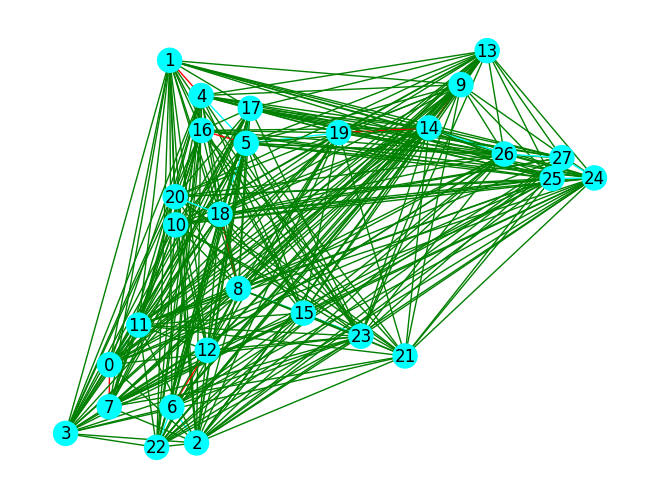

In [49]:
output_path = module_path + '/vis/img/countergan_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class1, countergan_cf_class1, position=pos_class_1_og, img_store_address=output_path)

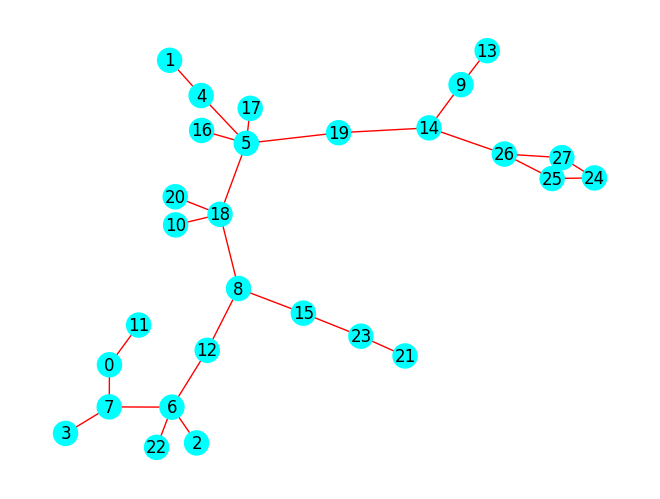

In [50]:
output_path = module_path + '/vis/img/cf2_class1.svg'
dtan.draw_counterfactual_actions_custom_position(og_inst_class1, cf2_cf_class1, position=pos_class_1_og, img_store_address=output_path)